# Model Performance Summary

|  Model                |  Out Of Box AUC  |  Tuned AUC  |
|-----------------------|------------------|-------------|
|  Naive Bayes          |  0.8349          |  N/A        |
|  Logistic Regression  |  0.8542          |  N/A        |
|  KNN                  |  0.7774          |  0.8362     |
|  SVM (RBF)            |  0.8343          |  0.8423     |
|  SVM (Poly)           |  0.8178          |  0.8482     |
|  Random Forest        |  0.8062          |  0.8465     |

The SVM with the polynomial kernel edged out the Random Forest. But the cake goes to Logistic Regression!

Also, the SVM with the polynomial kernel ended up being a linear kernel. But the degree of polynomial was gridsearched.

In [45]:
# General
import pandas as pd
import numpy as np
from time import time
from pprint import PrettyPrinter
import pickle

# Data Tools
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

# Models
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Plotting Tools
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
%matplotlib inline
pp = PrettyPrinter()

# Load

In [2]:
df = pd.read_csv('../data/telco_churn_numeric.csv')

In [8]:
# Seperate Train and Test
full_target = df['Churn']
train_cols = [col for col in df.columns[1:] if col != 'Churn']
full_train = df[train_cols]

# Standardize
scaler = StandardScaler()
full_train = pd.DataFrame(scaler.fit_transform(full_train), columns=full_train.columns)

# Train Test Split
train_x, test_x, train_y, test_y = train_test_split(full_train, full_target, random_state=42)

In [9]:
def grid_classifier(model, train, target, parameters={}, cv=5, timed=True, feat_imp=False):
    '''
    For tuning models.
    
    Automatically plots CV results, but this requires training over on parameter at a time.
    If the parameters argument stays an empty dictionary then no plot is made (duh...)
    
    Returns the GridSearch object
    
        Parameters:
        -----------
    model - model
    train - array of training data
    target - array of target data
    parameters - dict of parameters the GSearcher will run over
    cv - int, k-fold number
    timed - boolean, gives printout of timings
    
        Returns :
        ---------
    gsearcher - fitted and searched GridSearchCV object
    '''
    if timed:
        start = time()
    
    # Grid Search
    gsearcher = GridSearchCV(
        estimator=model, 
        param_grid=parameters,
        scoring='roc_auc',
        n_jobs=-1,
        cv=cv,
        return_train_score=True
    )
    gsearcher.fit(train, target)
    results = gsearcher.cv_results_
    
    if timed:
        passed = time() - start
        print(f'Seconds to fit: {passed:.2f}')

    # Print Report
    print('Grid Scores: \n')
    pp.pprint(results)
    print(f'Best Model Parameters: {gsearcher.best_params_}')
    print(f'Best Model Score: {gsearcher.best_score_:.4f}')
    
    # Plot CV Results
    if parameters:
        test_means = results['mean_test_score']
        train_means = results['mean_train_score']
        x = range(len(test_means))
        model_name = str(model.__class__).split('.')[-1][:-2]
        param = list(results['params'][0].keys())[0]
        labels = [str(pair[param]) for pair in results['params']]

        plt.figure(figsize=(10, 8))
        plt.plot(x, test_means, label='Test', color='blue')
        plt.plot(x, train_means, label='Train', color='green')
        plt.title(f'{model_name} over {param}')
        plt.xlabel(param)
        plt.ylabel('AUC Scores')
        plt.xticks(x, labels, rotation=60)
        plt.legend()
    
    # Plot Feature Importance
    if feat_imp:
        best_model = gsearcher.best_estimator_
        best_model.fit(train, target)
        feat_series = pd.Series(best_model.feature_importances_, index=train.columns)
        feat_series.sort_values(ascending=False, inplace=True)

        plt.figure(figsize=(10, 8))
        feat_series.plot(kind='bar', title='Feature Importances')
        plt.ylabel('Feature Importance Score')
        plt.xticks(rotation=60)        
    
    return gsearcher

## Modeling
### Naive Bayes
Nothing to tune here, so just running on y dataset

In [11]:
model = GaussianNB()

bayes_gsearch = grid_classifier(model, test_x, test_y)

Seconds to fit: 0.18
Grid Scores: 

{'mean_fit_time': array([0.01086359]),
 'mean_score_time': array([0.00646882]),
 'mean_test_score': array([0.8349295]),
 'mean_train_score': array([0.83742252]),
 'params': [{}],
 'rank_test_score': array([1], dtype=int32),
 'split0_test_score': array([0.85055934]),
 'split0_train_score': array([0.83308922]),
 'split1_test_score': array([0.85971952]),
 'split1_train_score': array([0.83218111]),
 'split2_test_score': array([0.82275391]),
 'split2_train_score': array([0.84052494]),
 'split3_test_score': array([0.83463542]),
 'split3_train_score': array([0.83832496]),
 'split4_test_score': array([0.80678454]),
 'split4_train_score': array([0.84299236]),
 'std_fit_time': array([0.00380178]),
 'std_score_time': array([0.00370637]),
 'std_test_score': array([0.01896563]),
 'std_train_score': array([0.00418837])}
Best Model Parameters: {}
Best Model Score: 0.8349


---
### Logistic Regression

In [12]:
model = LogisticRegression()

grid_classifier(model, test_x, test_y)

Seconds to fit: 0.21
Grid Scores: 

{'mean_fit_time': array([0.0254488]),
 'mean_score_time': array([0.00503764]),
 'mean_test_score': array([0.85415784]),
 'mean_train_score': array([0.86455128]),
 'params': [{}],
 'rank_test_score': array([1], dtype=int32),
 'split0_test_score': array([0.85720655]),
 'split0_train_score': array([0.86268866]),
 'split1_test_score': array([0.87127108]),
 'split1_train_score': array([0.86091957]),
 'split2_test_score': array([0.84379069]),
 'split2_train_score': array([0.8680546]),
 'split3_test_score': array([0.84549967]),
 'split3_train_score': array([0.86664605]),
 'split4_test_score': array([0.85296053]),
 'split4_train_score': array([0.86444754]),
 'std_fit_time': array([0.00947183]),
 'std_score_time': array([0.00197577]),
 'std_test_score': array([0.0098652]),
 'std_train_score': array([0.00258189])}
Best Model Parameters: {}
Best Model Score: 0.8542


GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1, param_grid={},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=0)

Seconds to fit: 0.85
Grid Scores: 

{'mean_fit_time': array([0.02675452, 0.0358335 , 0.05390315, 0.06881843, 0.06429439,
       0.06330929, 0.05490408]),
 'mean_score_time': array([0.00674162, 0.00314279, 0.00194907, 0.00347714, 0.00404997,
       0.00687041, 0.0021039 ]),
 'mean_test_score': array([0.8302657 , 0.83541195, 0.83898607, 0.83978102, 0.83986513,
       0.83986791, 0.83986606]),
 'mean_train_score': array([0.83232889, 0.83847093, 0.84251511, 0.84362478, 0.84376897,
       0.84377879, 0.84377971]),
 'param_C': masked_array(data=[0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0],
             mask=[False, False, False, False, False, False, False],
       fill_value='?',
            dtype=object),
 'params': [{'C': 0.001},
            {'C': 0.01},
            {'C': 0.1},
            {'C': 1.0},
            {'C': 10.0},
            {'C': 100.0},
            {'C': 1000.0}],
 'rank_test_score': array([7, 6, 5, 4, 3, 1, 2], dtype=int32),
 'split0_test_score': array([0.85579649, 0.859513

GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=0)

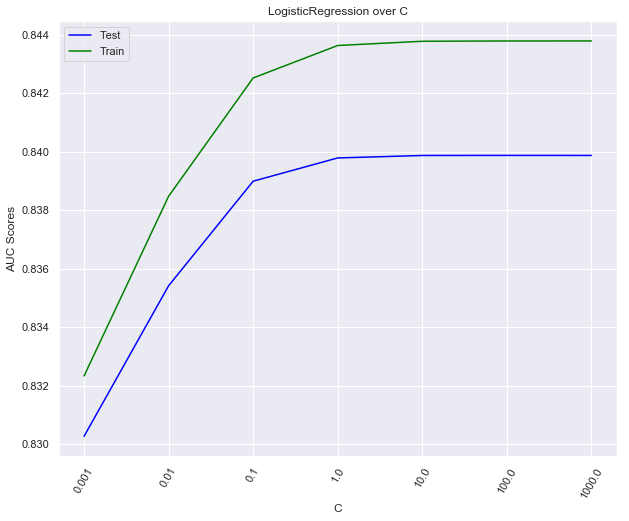

In [14]:
model = LogisticRegression()

parameters = {'C': np.logspace(-3, 3, 7)}

grid_classifier(model, train_x, train_y, parameters)

That's an overfit, sticking with default value of C, initial run is the best LogReg run

---
### KNN

In [17]:
model = KNeighborsClassifier()

grid_classifier(model, test_x, test_y)

Seconds to fit: 0.41
Grid Scores: 

{'mean_fit_time': array([0.00949144]),
 'mean_score_time': array([0.0348701]),
 'mean_test_score': array([0.7774273]),
 'mean_train_score': array([0.89597284]),
 'params': [{}],
 'rank_test_score': array([1], dtype=int32),
 'split0_test_score': array([0.81476978]),
 'split0_train_score': array([0.89074317]),
 'split1_test_score': array([0.77893969]),
 'split1_train_score': array([0.89592435]),
 'split2_test_score': array([0.77701823]),
 'split2_train_score': array([0.89944981]),
 'split3_test_score': array([0.77085368]),
 'split3_train_score': array([0.8957713]),
 'split4_test_score': array([0.74535362]),
 'split4_train_score': array([0.89797555]),
 'std_fit_time': array([0.00303625]),
 'std_score_time': array([0.00791031]),
 'std_test_score': array([0.02221932]),
 'std_train_score': array([0.00294933])}
Best Model Parameters: {}
Best Model Score: 0.7774


GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=-1, param_grid={},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=0)

Seconds to fit: 75.59
Grid Scores: 

{'mean_fit_time': array([0.02497692, 0.02483535, 0.02324204, 0.02111912, 0.01977553,
       0.0199367 , 0.0233428 , 0.02090759, 0.0237268 , 0.02195687,
       0.02378283, 0.02420597, 0.02459354, 0.02454929, 0.02495332,
       0.02246041, 0.02353792, 0.03341031, 0.0257359 , 0.02096148,
       0.02808356, 0.02357392, 0.02209835, 0.03039565, 0.02164116,
       0.02226434]),
 'mean_score_time': array([0.251264  , 0.30684185, 0.34493227, 0.32607388, 0.34226322,
       0.35106544, 0.35443482, 0.42514248, 0.45506067, 0.43203101,
       0.43783007, 0.44896102, 0.47094221, 0.44132447, 0.4588573 ,
       0.46709437, 0.44669108, 0.63628645, 0.54404297, 0.51786513,
       0.6629066 , 0.57749276, 0.54409304, 0.61379199, 0.47538042,
       0.59444423]),
 'mean_test_score': array([0.7587538 , 0.79660489, 0.80660478, 0.81060434, 0.81545732,
       0.8165731 , 0.81929035, 0.81990359, 0.82218405, 0.82282709,
       0.82288116, 0.82319854, 0.82353407, 0.82330959, 0.82

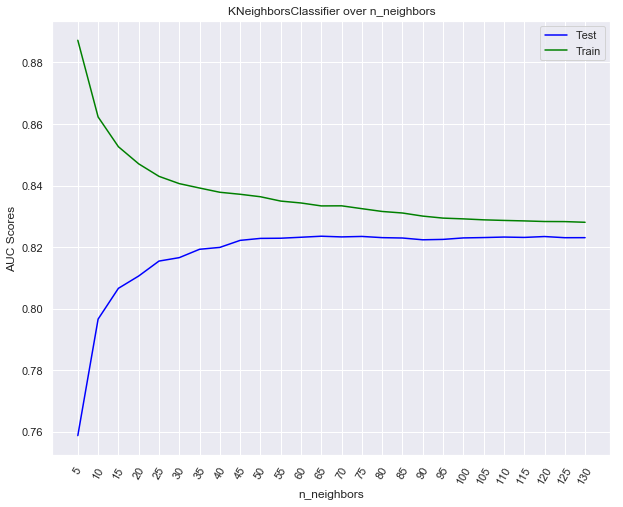

In [18]:
model = KNeighborsClassifier()

parameters = {'n_neighbors': np.arange(5, 131, 5)}

knn_gsearch = grid_classifier(model, train_x, train_y, parameters)

In [19]:
model = KNeighborsClassifier(n_neighbors=65)

grid_classifier(model, test_x, test_y)

Seconds to fit: 0.60
Grid Scores: 

{'mean_fit_time': array([0.00759101]),
 'mean_score_time': array([0.04478092]),
 'mean_test_score': array([0.83624212]),
 'mean_train_score': array([0.8433549]),
 'params': [{}],
 'rank_test_score': array([1], dtype=int32),
 'split0_test_score': array([0.85747001]),
 'split0_train_score': array([0.84013373]),
 'split1_test_score': array([0.84741813]),
 'split1_train_score': array([0.83889703]),
 'split2_test_score': array([0.83076986]),
 'split2_train_score': array([0.84685386]),
 'split3_test_score': array([0.82924398]),
 'split3_train_score': array([0.84459662]),
 'split4_test_score': array([0.81615954]),
 'split4_train_score': array([0.84629325]),
 'std_fit_time': array([0.00196157]),
 'std_score_time': array([0.00341834]),
 'std_test_score': array([0.01454403]),
 'std_train_score': array([0.00324552])}
Best Model Parameters: {}
Best Model Score: 0.8362


GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=65, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=-1, param_grid={},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=0)

---
### Support Vector Machine (RBF Kernel)
Baseline

In [20]:
model = SVC(random_state=42)

svc_rbf_gsearch = grid_classifier(model, test_x, test_y)

Seconds to fit: 0.49
Grid Scores: 

{'mean_fit_time': array([0.08102975]),
 'mean_score_time': array([0.01443634]),
 'mean_test_score': array([0.83429559]),
 'mean_train_score': array([0.91999163]),
 'params': [{}],
 'rank_test_score': array([1], dtype=int32),
 'split0_test_score': array([0.84962711]),
 'split0_train_score': array([0.91768452]),
 'split1_test_score': array([0.84601978]),
 'split1_train_score': array([0.91793543]),
 'split2_test_score': array([0.81722005]),
 'split2_train_score': array([0.92129184]),
 'split3_test_score': array([0.82661947]),
 'split3_train_score': array([0.91986294]),
 'split4_test_score': array([0.83190789]),
 'split4_train_score': array([0.92318343]),
 'std_fit_time': array([0.01391036]),
 'std_score_time': array([0.0026716]),
 'std_test_score': array([0.01207756]),
 'std_train_score': array([0.00207101])}
Best Model Parameters: {}
Best Model Score: 0.8343


#### C

Seconds to fit: 38.62
Grid Scores: 

{'mean_fit_time': array([0.97510161, 0.89590707, 0.94480405, 0.91143537, 0.8108098 ,
       0.83018522, 0.89751287, 1.05663786, 1.26852226, 2.24317017,
       2.65603781, 3.9115016 , 3.85262856]),
 'mean_score_time': array([0.27945724, 0.12711849, 0.1307631 , 0.1373456 , 0.12409883,
       0.14231791, 0.13493619, 0.14286637, 0.12579947, 0.11351862,
       0.1176065 , 0.09970093, 0.08464484]),
 'mean_test_score': array([0.81577701, 0.81551172, 0.81544609, 0.8150116 , 0.81260841,
       0.80370413, 0.80032771, 0.78516595, 0.77451336, 0.75006045,
       0.74126802, 0.72810035, 0.72498299]),
 'mean_train_score': array([0.83140155, 0.83155519, 0.83153971, 0.83327267, 0.84008522,
       0.86610816, 0.88271743, 0.92674725, 0.94491073, 0.97362562,
       0.97876542, 0.98461902, 0.98598787]),
 'param_C': masked_array(data=[0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1.0, 5.0, 10.0,
                   50.0, 100.0, 500.0, 1000.0],
             mask=[False, False, Fals

GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'C': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1.0, 5.0, 10.0, 50.0, 100.0, 500.0, 1000.0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=0)

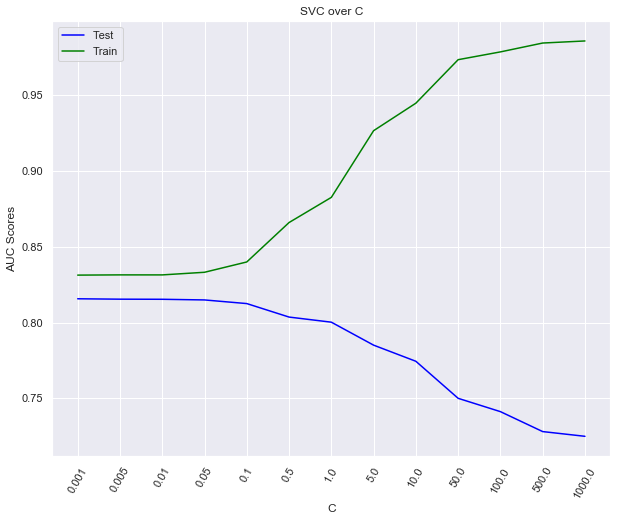

In [21]:
model = SVC(random_state=42)

parameters = {'C': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1.0, 5.0, 10.0, 50.0, 100.0, 500.0, 1000.0]}

grid_classifier(model, train_x, train_y, parameters)

#### Gamma

Seconds to fit: 45.08
Grid Scores: 

{'mean_fit_time': array([0.89736657, 0.87704759, 0.88214803, 0.8652914 , 0.87016945,
       0.85287938, 0.82527251, 0.7947721 , 0.77771888, 0.91366296,
       1.13992319, 0.91160192, 0.85965505, 1.00923619, 1.0034234 ,
       0.91219521, 0.85697784, 0.90617614, 0.94199038, 1.24698429,
       0.85899415]),
 'mean_score_time': array([0.26633706, 0.12667646, 0.14268489, 0.13870335, 0.1331326 ,
       0.13451157, 0.18798966, 0.12932138, 0.13836241, 0.2023716 ,
       0.20960417, 0.15457506, 0.14509492, 0.1508594 , 0.13426099,
       0.16554942, 0.14296761, 0.15098534, 0.16399941, 0.17275395,
       0.13957672]),
 'mean_test_score': array([0.82502629, 0.82422874, 0.82361423, 0.82258384, 0.82140465,
       0.81991856, 0.81811997, 0.81606719, 0.81432126, 0.81266593,
       0.81092091, 0.80891527, 0.80711206, 0.80508238, 0.80343437,
       0.80176512, 0.80038156, 0.79854133, 0.79743674, 0.79668236,
       0.79555652]),
 'mean_train_score': array([0.82924086

GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=0.01, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'gamma': array([0.005, 0.01 , 0.015, 0.02 , 0.025, 0.03 , 0.035, 0.04 , 0.045,
       0.05 , 0.055, 0.06 , 0.065, 0.07 , 0.075, 0.08 , 0.085, 0.09 ,
       0.095, 0.1  , 0.105])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=0)

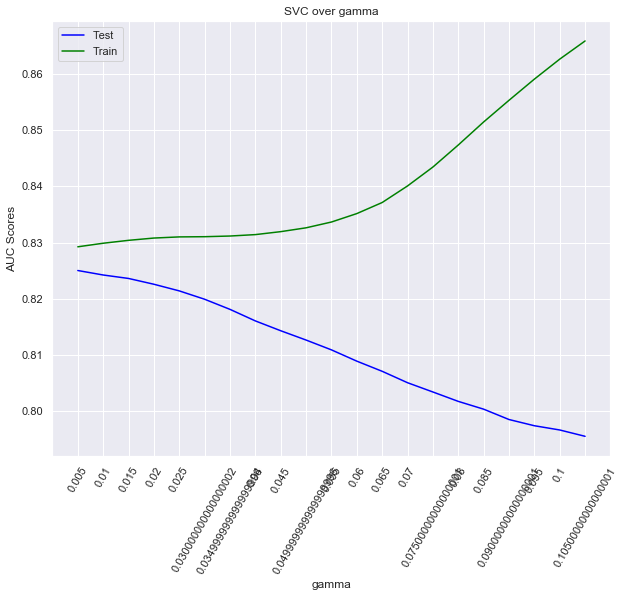

In [22]:
model = SVC(
    random_state=42,
    C=0.01
)

parameters = {'gamma': np.arange(0.005, 0.11, 0.005)}

grid_classifier(model, train_x, train_y, parameters)

#### SVC (RBF Kernel) Final Model

In [24]:
model = SVC(
    random_state=42,
    C=0.01,
    gamma=0.005
)

svc_rbf_gsearch = grid_classifier(model, test_x, test_y)

Seconds to fit: 0.49
Grid Scores: 

{'mean_fit_time': array([0.08012819]),
 'mean_score_time': array([0.01545601]),
 'mean_test_score': array([0.84232167]),
 'mean_train_score': array([0.85163377]),
 'params': [{}],
 'rank_test_score': array([1], dtype=int32),
 'split0_test_score': array([0.84601978]),
 'split0_train_score': array([0.85010762]),
 'split1_test_score': array([0.85805772]),
 'split1_train_score': array([0.8475285]),
 'split2_test_score': array([0.83239746]),
 'split2_train_score': array([0.85503285]),
 'split3_test_score': array([0.83764648]),
 'split3_train_score': array([0.85347416]),
 'split4_test_score': array([0.83741776]),
 'split4_train_score': array([0.85202572]),
 'std_fit_time': array([0.01736111]),
 'std_score_time': array([0.0047688]),
 'std_test_score': array([0.00901264]),
 'std_train_score': array([0.00261828])}
Best Model Parameters: {}
Best Model Score: 0.8423


---
### Support Vector Machine (Polynomial Kernel)

In [27]:
model = SVC(
    random_state=42,
    kernel='poly'
)

grid_classifier(model, test_x, test_y)

Seconds to fit: 0.49
Grid Scores: 

{'mean_fit_time': array([0.07525764]),
 'mean_score_time': array([0.01115036]),
 'mean_test_score': array([0.81784816]),
 'mean_train_score': array([0.93298505]),
 'params': [{}],
 'rank_test_score': array([1], dtype=int32),
 'split0_test_score': array([0.83653534]),
 'split0_train_score': array([0.93119786]),
 'split1_test_score': array([0.8255107]),
 'split1_train_score': array([0.93425078]),
 'split2_test_score': array([0.79964193]),
 'split2_train_score': array([0.93584047]),
 'split3_test_score': array([0.81750488]),
 'split3_train_score': array([0.93061727]),
 'split4_test_score': array([0.80995066]),
 'split4_train_score': array([0.93301885]),
 'std_fit_time': array([0.0118712]),
 'std_score_time': array([0.00230541]),
 'std_test_score': array([0.01266812]),
 'std_train_score': array([0.0019265])}
Best Model Parameters: {}
Best Model Score: 0.8178


GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=-1, param_grid={},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=0)

#### Degree

Seconds to fit: 10.69
Grid Scores: 

{'mean_fit_time': array([0.71274691, 0.7514524 , 0.75095286, 0.88867402, 0.85707331,
       0.89111123]),
 'mean_score_time': array([0.0787097 , 0.0763185 , 0.08284826, 0.1028584 , 0.10221152,
       0.1094614 ]),
 'mean_test_score': array([0.830802  , 0.80379007, 0.80632086, 0.77543524, 0.78016328,
       0.75202551]),
 'mean_train_score': array([0.83392154, 0.83543014, 0.89003027, 0.91922572, 0.9380984 ,
       0.94603179]),
 'param_degree': masked_array(data=[1, 2, 3, 4, 5, 6],
             mask=[False, False, False, False, False, False],
       fill_value='?',
            dtype=object),
 'params': [{'degree': 1},
            {'degree': 2},
            {'degree': 3},
            {'degree': 4},
            {'degree': 5},
            {'degree': 6}],
 'rank_test_score': array([1, 3, 2, 5, 4, 6], dtype=int32),
 'split0_test_score': array([0.85444353, 0.83185877, 0.83374738, 0.79955856, 0.81018369,
       0.77553772]),
 'split0_train_score': array([0.

GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'degree': range(1, 7)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score=True, scoring='roc_auc', verbose=0)

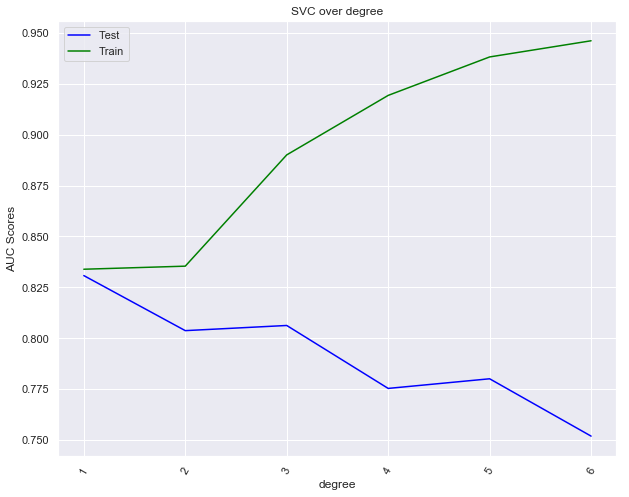

In [29]:
model = SVC(
    random_state=42,
    kernel='poly'
)

parameters = {'degree': range(1, 7)}

grid_classifier(model, train_x, train_y, parameters)

#### C

Seconds to fit: 58.20
Grid Scores: 

{'mean_fit_time': array([ 0.73572583,  0.70915284,  0.71094418,  0.68572378,  0.6761755 ,
        0.66576447,  0.84340782,  0.82146802,  1.83918839,  3.05099201,
        2.85691581,  9.00399966, 13.28697605]),
 'mean_score_time': array([0.08919339, 0.0777236 , 0.07983761, 0.09981575, 0.0925868 ,
       0.07643661, 0.08144469, 0.07111197, 0.08163919, 0.10233665,
       0.07590261, 0.07456117, 0.05736332]),
 'mean_test_score': array([0.8254274 , 0.82550965, 0.82550317, 0.82580448, 0.82760117,
       0.8302446 , 0.830802  , 0.82911341, 0.82873813, 0.82849967,
       0.82845901, 0.82845069, 0.82844144]),
 'mean_train_score': array([0.82835886, 0.8284299 , 0.82840663, 0.82893482, 0.83085709,
       0.83375877, 0.83392154, 0.83297745, 0.83275462, 0.83266245,
       0.83258031, 0.83258799, 0.83257338]),
 'param_C': masked_array(data=[0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1.0, 5.0, 10.0,
                   50.0, 100.0, 500.0, 1000.0],
             mask=[False

GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=1, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'C': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1.0, 5.0, 10.0, 50.0, 100.0, 500.0, 1000.0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=0)

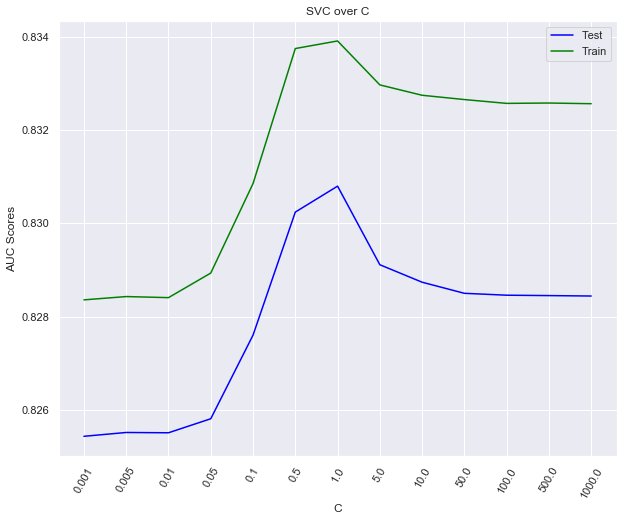

In [30]:
model = SVC(
    random_state=42,
    kernel='poly',
    degree=1
)

parameters = {'C': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1.0, 5.0, 10.0, 50.0, 100.0, 500.0, 1000.0]}

grid_classifier(model, train_x, train_y, parameters)

#### gamma
Sticking with the default value of gamma which is 1/n_features

In this case, that's 1/24 ~ 0.4 which is awfully close to the Gridsearch's favorite value

Seconds to fit: 26.31
Grid Scores: 

{'mean_fit_time': array([0.6707984 , 0.63067703, 0.59459023, 0.57189932, 0.57891922,
       0.57242274, 0.59957094, 0.57277703, 0.59509478, 0.59383345,
       0.62431607, 0.5962738 , 0.60441484, 0.57831564, 0.62055569,
       0.58088331, 0.61075706, 0.63905182, 0.62104087, 0.62822146,
       0.58658013]),
 'mean_score_time': array([0.07599726, 0.08147016, 0.0723598 , 0.07652235, 0.07089963,
       0.07428889, 0.07305212, 0.07639489, 0.07366385, 0.07366877,
       0.07382836, 0.06777883, 0.07683115, 0.06611986, 0.07391186,
       0.07098718, 0.06741729, 0.07352362, 0.07096052, 0.0675683 ,
       0.06308789]),
 'mean_test_score': array([0.82808822, 0.82981013, 0.83021687, 0.83014849, 0.83053207,
       0.83077425, 0.83083063, 0.83082602, 0.83067263, 0.83060794,
       0.83062272, 0.83042954, 0.83034267, 0.83027984, 0.83022716,
       0.83014396, 0.83019204, 0.83017078, 0.8301412 , 0.83003675,
       0.82999054]),
 'mean_train_score': array([0.83134786

GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=1, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'gamma': array([0.005, 0.01 , 0.015, 0.02 , 0.025, 0.03 , 0.035, 0.04 , 0.045,
       0.05 , 0.055, 0.06 , 0.065, 0.07 , 0.075, 0.08 , 0.085, 0.09 ,
       0.095, 0.1  , 0.105])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=0)

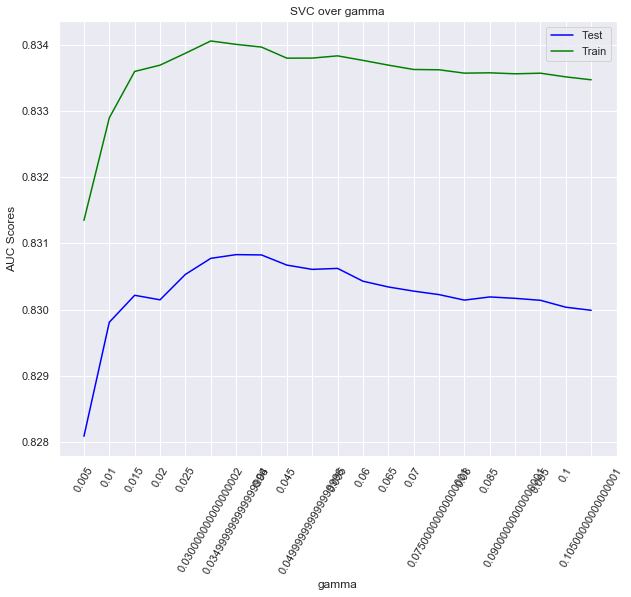

In [34]:
model = SVC(
    random_state=42,
    kernel='poly',
    degree=1,
)

parameters = {'gamma': np.arange(0.005, 0.11, 0.005)}

grid_classifier(model, train_x, train_y, parameters)

#### SVC (Polynomial Kernel) Final Model

In [35]:
model = SVC(
    random_state=42,
    kernel='poly',
    degree=1,
)

grid_classifier(model, test_x, test_y)

Seconds to fit: 0.39
Grid Scores: 

{'mean_fit_time': array([0.06096725]),
 'mean_score_time': array([0.00995836]),
 'mean_test_score': array([0.84824718]),
 'mean_train_score': array([0.8583331]),
 'params': [{}],
 'rank_test_score': array([1], dtype=int32),
 'split0_test_score': array([0.85120785]),
 'split0_train_score': array([0.85727059]),
 'split1_test_score': array([0.86284047]),
 'split1_train_score': array([0.85423295]),
 'split2_test_score': array([0.83813477]),
 'split2_train_score': array([0.86122944]),
 'split3_test_score': array([0.83654785]),
 'split3_train_score': array([0.86151828]),
 'split4_test_score': array([0.85246711]),
 'split4_train_score': array([0.85741426]),
 'std_fit_time': array([0.01366391]),
 'std_score_time': array([0.00294033]),
 'std_test_score': array([0.00978754]),
 'std_train_score': array([0.00273198])}
Best Model Parameters: {}
Best Model Score: 0.8482


GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=1, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=-1, param_grid={},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=0)

---
### Random Forest
#### Benchmark

Seconds to fit: 0.33
Grid Scores: 

{'mean_fit_time': array([0.04122629]),
 'mean_score_time': array([0.00439758]),
 'mean_test_score': array([0.80618931]),
 'mean_train_score': array([0.99913311]),
 'params': [{}],
 'rank_test_score': array([1], dtype=int32),
 'split0_test_score': array([0.80437338]),
 'split0_train_score': array([0.99951092]),
 'split1_test_score': array([0.80510295]),
 'split1_train_score': array([0.99923964]),
 'split2_test_score': array([0.79958089]),
 'split2_train_score': array([0.99911568]),
 'split3_test_score': array([0.78694661]),
 'split3_train_score': array([0.99898462]),
 'split4_test_score': array([0.83503289]),
 'split4_train_score': array([0.99881467]),
 'std_fit_time': array([0.008398]),
 'std_score_time': array([0.00166875]),
 'std_test_score': array([0.01579445]),
 'std_train_score': array([0.00023573])}
Best Model Parameters: {}
Best Model Score: 0.8062


GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1, param_grid={},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=0)

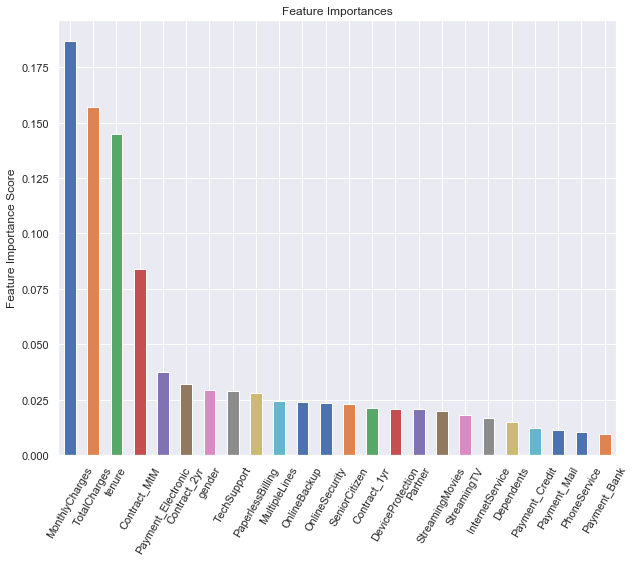

In [36]:
model = RandomForestClassifier(random_state=42)

grid_classifier(model, test_x, test_y, feat_imp=True)

#### N_Estimators
I don't want to overfit, so I'll pick a small number for now and max it out after other features are trained.

Seconds to fit: 14.59
Grid Scores: 

{'mean_fit_time': array([0.07652841, 0.10390382, 0.14411259, 0.28305492, 0.3257288 ,
       0.29173379, 0.34860258, 0.31327987, 0.3649889 , 0.39791231,
       0.49657502, 0.54409132, 0.50635824, 0.53541923, 0.67777109,
       1.03386431, 0.82645974, 0.72535973, 0.7506906 ]),
 'mean_score_time': array([0.00768156, 0.00700636, 0.00969796, 0.02543173, 0.02904563,
       0.02332187, 0.02023807, 0.0241354 , 0.0207303 , 0.02672181,
       0.02627234, 0.04188209, 0.03798695, 0.03306522, 0.04263635,
       0.06113997, 0.05414052, 0.03955641, 0.03502026]),
 'mean_test_score': array([0.79237761, 0.80384309, 0.81164157, 0.81483448, 0.81622342,
       0.81711318, 0.81857994, 0.82083238, 0.82137152, 0.82231416,
       0.82284976, 0.82305959, 0.82294352, 0.82359231, 0.82361867,
       0.82419948, 0.82412732, 0.82422017, 0.82412954]),
 'mean_train_score': array([0.99907615, 0.99971907, 0.99987986, 0.99995154, 0.99997129,
       0.9999758 , 0.99997424, 0.99997346, 

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_estimators': array([ 10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,  65,  70,
        75,  80,  85,  90,  95, 100])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=0)

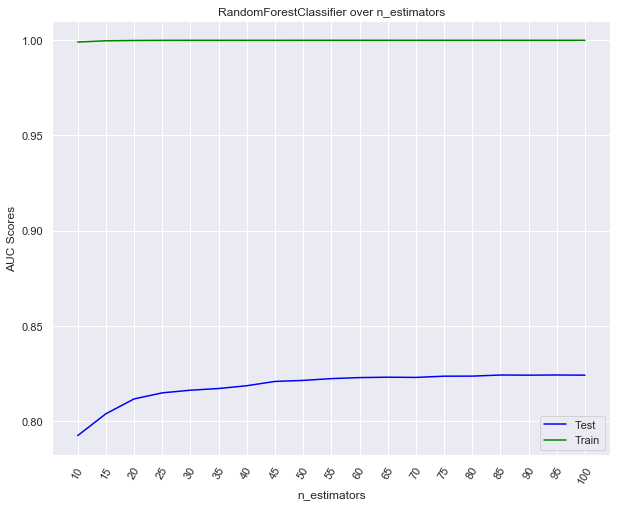

In [37]:
model = RandomForestClassifier(random_state=42)

parameters = {'n_estimators': np.arange(10, 101, 5)}

grid_classifier(model, train_x, train_y, parameters)

#### Max Depth

Seconds to fit: 3.93
Grid Scores: 

{'mean_fit_time': array([0.18009219, 0.1870573 , 0.21167645, 0.26717658, 0.34052901,
       0.4912518 , 0.46417699]),
 'mean_score_time': array([0.01393003, 0.01235147, 0.01297936, 0.01561098, 0.02167244,
       0.02363691, 0.03229342]),
 'mean_test_score': array([0.83532107, 0.83801426, 0.84002612, 0.84054774, 0.83988932,
       0.83924963, 0.83890387]),
 'mean_train_score': array([0.84099704, 0.8476793 , 0.85794741, 0.87160432, 0.89032479,
       0.91373353, 0.938253  ]),
 'param_max_depth': masked_array(data=[3, 4, 5, 6, 7, 8, 9],
             mask=[False, False, False, False, False, False, False],
       fill_value='?',
            dtype=object),
 'params': [{'max_depth': 3},
            {'max_depth': 4},
            {'max_depth': 5},
            {'max_depth': 6},
            {'max_depth': 7},
            {'max_depth': 8},
            {'max_depth': 9}],
 'rank_test_score': array([7, 6, 2, 1, 3, 4, 5], dtype=int32),
 'split0_test_score': array([0.

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=0)

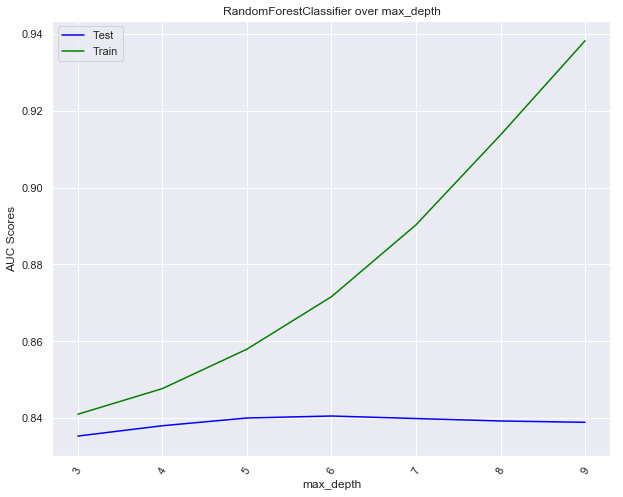

In [38]:
model = RandomForestClassifier(
    random_state=42,
    n_estimators=50,
)

parameters = {'max_depth': list(range(3, 10))}

grid_classifier(model, train_x, train_y, parameters)

#### Min Samples Split

Seconds to fit: 19.22
Grid Scores: 

{'mean_fit_time': array([0.22414303, 0.21582232, 0.23303742, 0.24595137, 0.32899199,
       0.3172574 , 0.24806914, 0.31325879, 0.24920149, 0.26166515,
       0.25023932, 0.22311659, 0.26238098, 0.25259771, 0.23011785,
       0.22640047, 0.24459505, 0.23716497, 0.23271871, 0.23382406,
       0.23548346, 0.23637552, 0.2370502 , 0.22966094, 0.24070802,
       0.23388624, 0.23095117, 0.24518495, 0.23812585, 0.23247552,
       0.23642144, 0.23900771, 0.2264154 , 0.2365211 , 0.22719917,
       0.22358637, 0.24053402, 0.23608418, 0.21785216, 0.23664083,
       0.24203401, 0.22159958, 0.24619064, 0.22664585, 0.2227612 ,
       0.23691015, 0.23487306, 0.229951  , 0.23403726, 0.22497087]),
 'mean_score_time': array([0.01563034, 0.01743603, 0.01557384, 0.01554961, 0.01591606,
       0.0154954 , 0.01832547, 0.01691427, 0.01529698, 0.01586108,
       0.01540565, 0.01379814, 0.01636343, 0.01284895, 0.0160233 ,
       0.01469231, 0.0156323 , 0.01572757, 0.0130808

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=6, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'min_samples_split': range(2, 101, 2)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=0)

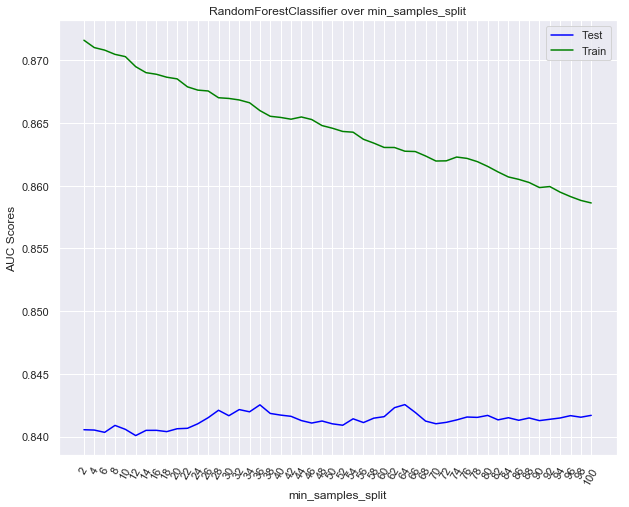

In [40]:
model = RandomForestClassifier(
    random_state=42,
    n_estimators=50,
    max_depth=6
)

parameters = {'min_samples_split': range(2, 101, 2)}

grid_classifier(model, train_x, train_y, parameters)

#### Min Samples Leaf

Seconds to fit: 8.36
Grid Scores: 

{'mean_fit_time': array([0.22819552, 0.21786008, 0.28295312, 0.34139624, 0.24076176,
       0.27941628, 0.25336518, 0.37251034, 0.26428795, 0.24941773,
       0.24340324, 0.23809724, 0.23391752, 0.24456501, 0.23605261,
       0.2401752 , 0.23926826, 0.20670466, 0.21839647, 0.21747184]),
 'mean_score_time': array([0.01611819, 0.02386904, 0.02004013, 0.03467174, 0.01359239,
       0.01498609, 0.01541018, 0.02829242, 0.01361675, 0.01617088,
       0.01455674, 0.0129786 , 0.01555066, 0.01459599, 0.01331849,
       0.01717119, 0.01282206, 0.01347904, 0.01532273, 0.01179166]),
 'mean_test_score': array([0.84253074, 0.84214067, 0.8423921 , 0.84236897, 0.84234172,
       0.84282096, 0.84279838, 0.84283071, 0.84256312, 0.84272805,
       0.84264444, 0.84215642, 0.84216573, 0.84224753, 0.84219717,
       0.84196381, 0.84206043, 0.84189965, 0.84230848, 0.84171059]),
 'mean_train_score': array([0.86599246, 0.86546612, 0.86502587, 0.86484085, 0.8646901 ,
       0

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=6, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=36,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'min_samples_leaf': range(1, 21)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=0)

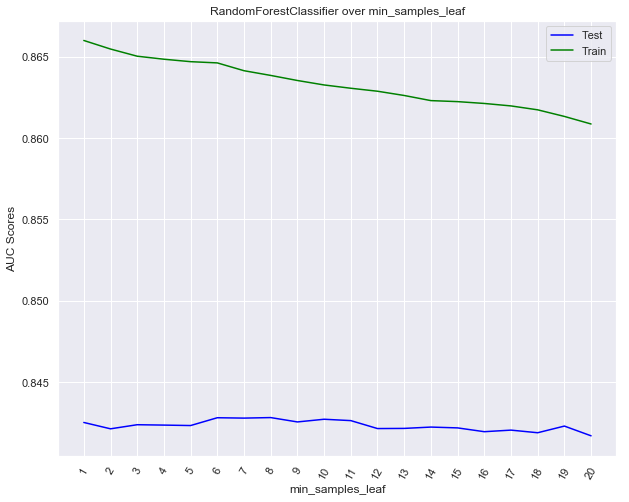

In [41]:
model = RandomForestClassifier(
    random_state=42,
    n_estimators=50,
    max_depth=6,
    min_samples_split=36
)

parameters = {'min_samples_leaf': range(1, 21)}

grid_classifier(model, train_x, train_y, parameters)

#### Max Features

Seconds to fit: 4.64
Grid Scores: 

{'mean_fit_time': array([0.23013425, 0.32465072, 0.31594462, 0.27830162, 0.2690742 ,
       0.29086938, 0.34198751, 0.33286376, 0.31523304]),
 'mean_score_time': array([0.02306328, 0.0216116 , 0.02397327, 0.01382155, 0.01441884,
       0.01617055, 0.01584191, 0.01239405, 0.0115798 ]),
 'mean_test_score': array([0.84005148, 0.84063229, 0.84004383, 0.84066999, 0.84125302,
       0.84084272, 0.84139088, 0.84032982, 0.84174998]),
 'mean_train_score': array([0.86632252, 0.86961604, 0.87156165, 0.87322413, 0.87497558,
       0.87662524, 0.87819184, 0.87938628, 0.87996972]),
 'param_max_features': masked_array(data=[3, 4, 5, 6, 7, 8, 9, 10, 11],
             mask=[False, False, False, False, False, False, False, False,
                   False],
       fill_value='?',
            dtype=object),
 'params': [{'max_features': 3},
            {'max_features': 4},
            {'max_features': 5},
            {'max_features': 6},
            {'max_features': 7},


GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=6, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=3, min_samples_split=6,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_features': range(3, 12)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score=True, scoring='roc_auc', verbose=0)

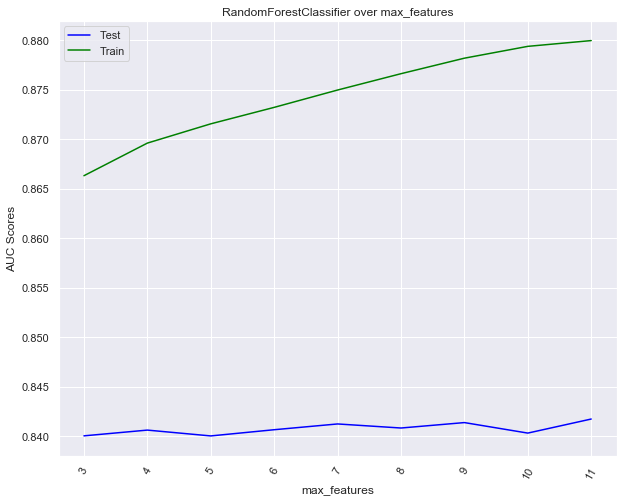

In [43]:
model = RandomForestClassifier(
    random_state=42,
    n_estimators=50,
    max_depth=6,
    min_samples_split=6,
    min_samples_leaf=3
)

parameters = {'max_features': range(3, 12)}

grid_classifier(model, train_x, train_y, parameters)

#### Final RFC Model

Seconds to fit: 0.33
Grid Scores: 

{'mean_fit_time': array([0.05521393]),
 'mean_score_time': array([0.00472078]),
 'mean_test_score': array([0.84645556]),
 'mean_train_score': array([0.87296257]),
 'params': [{}],
 'rank_test_score': array([1], dtype=int32),
 'split0_test_score': array([0.85187662]),
 'split0_train_score': array([0.87435395]),
 'split1_test_score': array([0.86677205]),
 'split1_train_score': array([0.8735783]),
 'split2_test_score': array([0.82655843]),
 'split2_train_score': array([0.87172166]),
 'split3_test_score': array([0.84075928]),
 'split3_train_score': array([0.87202067]),
 'split4_test_score': array([0.84623766]),
 'split4_train_score': array([0.87313825]),
 'std_fit_time': array([0.01304239]),
 'std_score_time': array([0.00138128]),
 'std_test_score': array([0.01320075]),
 'std_train_score': array([0.00097703])}
Best Model Parameters: {}
Best Model Score: 0.8465


GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=6, max_features=9, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=36, min_samples_split=6,
            min_weight_fraction_leaf=0.0, n_estimators=15, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1, param_grid={},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=0)

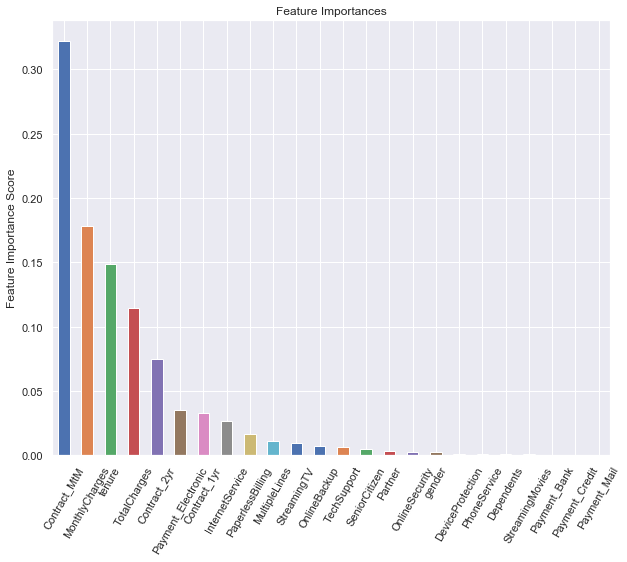

In [44]:
model = RandomForestClassifier(
    random_state=42,
    n_estimators=15,
    max_depth=6,
    min_samples_split=6,
    min_samples_leaf=36,
    max_features=9
)

grid_classifier(model, test_x, test_y, feat_imp=True)